# MultiLens Code initialisation

### this notebooks tests and initialises a multi lens plane

In [1]:
from MultiLens.lens_assembly import LensAssembly
from MultiLens.Profiles.point_mass import PointMass
from MultiLens.lens_object import LensObject
from MultiLens.Cosmo.cosmo import CosmoProp
import MultiLens.Utils.utils as utils
from MultiLens.MultiLens import MultiLens
from MultiLens.Profiles.gaussian import Gaussian
from MultiLens.numerics import Numerics
import MultiLens.Utils.constants as const
from MultiLens.Utils.halo_param import HaloParam
from MultiLens.Cosmo.cosmo import CosmoProp


import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="dark")
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)

In [2]:
lensAssembly = LensAssembly()
cosmo = CosmoProp()
multiLens = MultiLens()
gaussian = Gaussian()
numerics = Numerics()
haloParam = HaloParam()
cosmo = CosmoProp()

## define the lenses

In [62]:
lens_type = 'NFW' #  'NFW', 'SIS', 'point_mass'
lensAssembly.clear()
z = 0.1
mass = 10**4#10**12
pos_x, pos_y = 20, 20
lensObject = LensObject(redshift=z, type=lens_type, approximation='weak', main=False)
if lens_type == 'point_mass':
    kwargs_profile = {'mass': mass, 'pos_x': pos_x, 'pos_y': pos_y}
elif lens_type=='NFW':
    r200, rho_s, Rs, c = haloParam.profileMain(mass, z)
    kwargs_profile = {'rho_s': rho_s, 'Rs': Rs, 'pos_x': pos_x, 'pos_y': pos_y}
elif lens_type == 'SIS':
    sigma_v = np.sqrt(2*mass*const.M_sun*const.G/(const.Mpc/1000.))
    print sigma_v/1000
    kwargs_profile = {'sigma_v': sigma_v, 'pos_x': pos_x, 'pos_y': pos_y}
lensObject.add_info('kwargs_profile', kwargs_profile)
lensAssembly.add_lens(lensObject)

z = 0.8
mass = 10**13
pos_x, pos_y = -20, 20
lensObject = LensObject(redshift=z, type=lens_type, approximation='weak', main=False)
if lens_type == 'point_mass':
    kwargs_profile = {'mass': mass, 'pos_x': pos_x, 'pos_y': pos_y}
elif lens_type=='NFW':
    r200, rho_s, Rs, c = haloParam.profileMain(mass, z)
    kwargs_profile = {'rho_s': rho_s, 'Rs': Rs, 'pos_x': pos_x, 'pos_y': pos_y}
elif lens_type == 'SIS':
    sigma_v = np.sqrt(2*mass*const.M_sun*const.G/(const.Mpc/1000.))
    print sigma_v/1000
    kwargs_profile = {'sigma_v': sigma_v, 'pos_x': pos_x, 'pos_y': pos_y}
lensObject.add_info('kwargs_profile', kwargs_profile)
lensAssembly.add_lens(lensObject)


lens_type = 'SIS' #'point_mass' # 'SIS', 'NFW'

z = 0.295
mass = 10**11
pos_x, pos_y = 0.0, 0
lensObject = LensObject(redshift=z, type=lens_type, approximation='weak', main=True)
if lens_type == 'point_mass':
    kwargs_profile = {'mass': mass, 'pos_x': pos_x, 'pos_y': pos_y}
elif lens_type=='NFW':
    r200, rho_s, Rs, c = haloParam.profileMain(mass, z)
    kwargs_profile = {'rho_s': rho_s, 'Rs': Rs, 'pos_x': pos_x, 'pos_y': pos_y}
elif lens_type == 'SIS':
    sigma_v = np.sqrt(2*mass*const.M_sun*const.G/(const.Mpc/1000.))
    print sigma_v
    sigma_v = 200.*1000
    kwargs_profile = {'sigma_v': sigma_v, 'pos_x': pos_x, 'pos_y': pos_y}
lensObject.add_info('kwargs_profile', kwargs_profile)
lensAssembly.add_lens(lensObject)

if False:
    lensAssembly.print_info()


LensAssembly class cleared. No lens object specified.
927589.725085


## Gaussian source at (0,0)

In [68]:
x_array, y_array = utils.make_grid(300, 0.02)
z_source = 2#0.658
beta_x_full, beta_y_full = multiLens.full_ray_tracing(lensAssembly, z_source, x_array, y_array)
beta_x_born, beta_y_born = multiLens.born_ray_tracing(lensAssembly, z_source, x_array, y_array)
beta_x_analytic, beta_y_analytic = multiLens.analytic_mapping(lensAssembly, z_source, x_array, y_array, LOS_corrected=True)


sigma_source = 0.05*const.arcsec
flux_full = gaussian.function(beta_x_full, beta_y_full, amp=1, sigma_x=sigma_source, sigma_y=sigma_source, center_x=0.0, center_y=0)
flux_born = gaussian.function(beta_x_born, beta_y_born, amp=1, sigma_x=sigma_source, sigma_y=sigma_source, center_x=0.0, center_y=0)
flux_analytic = gaussian.function(beta_x_analytic, beta_y_analytic, amp=1, sigma_x=sigma_source, sigma_y=sigma_source, center_x=0.0, center_y=0)

print np.max(flux_full)

image_full = utils.array2image(flux_full)
image_born = utils.array2image(flux_born)
image_analytic = utils.array2image(flux_analytic)

kappa_analytic = numerics.kappa(beta_x_analytic, beta_y_analytic, x_array, y_array)
kappa_full = numerics.kappa(beta_x_full, beta_y_full, x_array, y_array)
kappa_born = numerics.kappa(beta_x_born, beta_y_born, x_array, y_array)


mag_full = numerics.magnification(beta_x_full, beta_y_full, x_array, y_array)
mag_born = numerics.magnification(beta_x_born, beta_y_born, x_array, y_array)
mag_analytic = numerics.magnification(beta_x_analytic, beta_y_analytic, x_array, y_array)

2.70850966293e+12


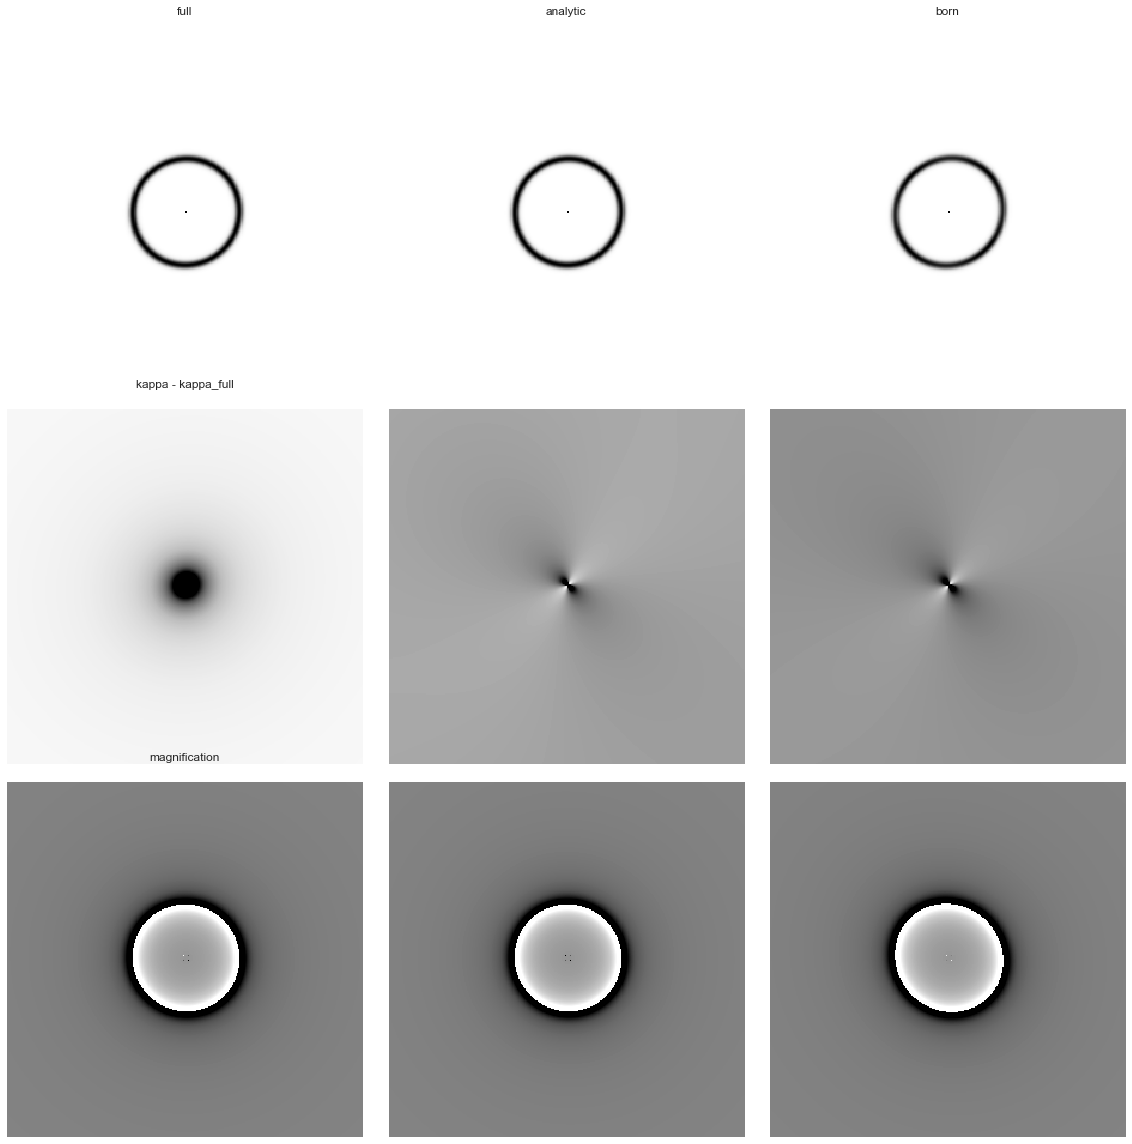

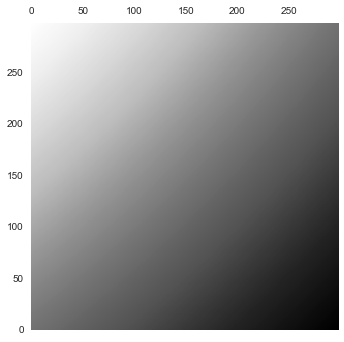

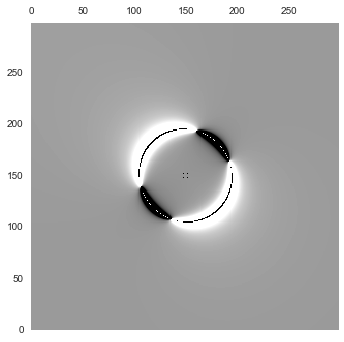

In [69]:
f, axes = plt.subplots(3, 3, figsize=(16, 16), sharex=False, sharey=False)

ax = axes[0][0]
im=ax.matshow(image_full,origin='lower')
ax.set_title('full')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax = axes[0][1]
im=ax.matshow(image_analytic,origin='lower')
ax.set_title('analytic')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax = axes[0][2]
im=ax.matshow(image_born,origin='lower')
ax.set_title('born')
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)




ax = axes[1][0]
ax.set_title('kappa - kappa_full')
im=ax.matshow(kappa_full,origin='lower', vmin=0, vmax=2)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax = axes[1][1]
im=ax.matshow(kappa_analytic-kappa_full,origin='lower', vmin=-0.1, vmax=0.1)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax = axes[1][2]
im=ax.matshow(kappa_born-kappa_full,origin='lower', vmin=-0.1, vmax=0.1)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)



ax = axes[2][0]
ax.set_title('magnification')
im=ax.matshow(mag_full,origin='lower', vmin=-10, vmax=10)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax = axes[2][1]
im=ax.matshow(mag_analytic,origin='lower', vmin=-10, vmax=10)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax = axes[2][2]
im=ax.matshow(mag_born,origin='lower', vmin=-10, vmax=10)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)
plt.show()


plt.matshow(kappa_analytic-kappa_born,origin='lower')
plt.show()

plt.matshow(mag_analytic-mag_born,origin='lower', vmin=-1, vmax=1)
plt.show()

## check numerics 

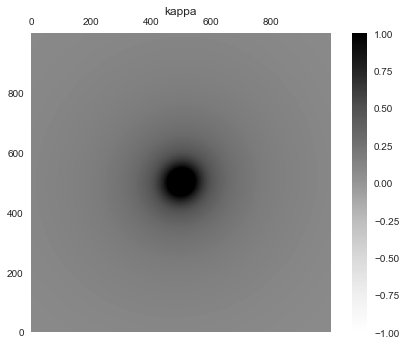

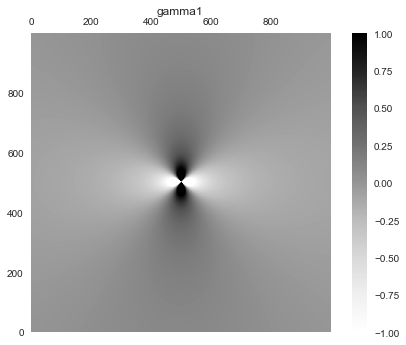

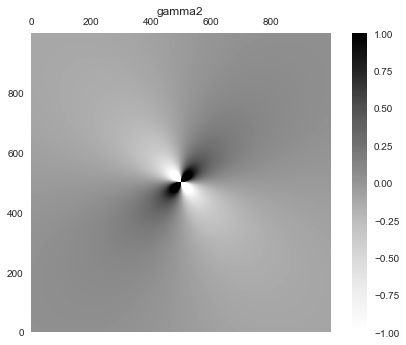

In [65]:
x_array_test, y_array_test = utils.make_grid(1000, 0.01)
beta_x_test, beta_y_test = multiLens.full_ray_tracing(lensAssembly, 3, x_array_test, y_array_test)


kappa_test = numerics.kappa(beta_x_test, beta_y_test, x_array_test, y_array_test)
gamma1_test, gamma2_test = numerics.gamma(beta_x_test, beta_y_test, x_array_test, y_array_test)



fig, ax1 = plt.subplots()
im=ax1.matshow(kappa_test,origin='lower', vmin=-1, vmax=1)
plt.axes(ax1)
fig.colorbar(im)
ax1.set_title('kappa')
plt.show()

fig, ax1 = plt.subplots()
im=ax1.matshow(gamma1_test,origin='lower', vmin=-1, vmax=1)
plt.axes(ax1)
fig.colorbar(im)
ax1.set_title('gamma1')
plt.show()

fig, ax1 = plt.subplots()
im=ax1.matshow(gamma2_test,origin='lower', vmin=-1, vmax=1)
plt.axes(ax1)
fig.colorbar(im)
ax1.set_title('gamma2')
plt.show()

In [7]:
# kappa mapps vs projected mass density

In [8]:
# magnification ratios of point-like sources (compare between different models)